<a href="https://colab.research.google.com/github/Elwing-Chou/nanshan1115/blob/main/2_danmu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import urllib.request as req
url = "https://github.com/Elwing-Chou/nanshan1115/raw/main/danmu.txt"
req.urlretrieve(url, "danmu.txt")

('danmu.txt', <http.client.HTTPMessage at 0x7ef032a094b0>)

In [12]:
import json
f = open("danmu.txt", "r", encoding="utf-8")
danmus = json.load(f)
f.close()
danmus

[{'text': '祝☆TV動畫化',
  'color': '#B538FA',
  'size': 2,
  'position': 1,
  'time': 0,
  'sn': 23255401,
  'userid': 'kumosorayk'},
 {'text': '要怎麼用雙語',
  'color': '#FFFFFF',
  'size': 1,
  'position': 0,
  'time': 0,
  'sn': 28413131,
  'userid': 'ilovehyunjin'},
 {'text': '20210822',
  'color': '#FFFFFF',
  'size': 1,
  'position': 0,
  'time': 2,
  'sn': 22480205,
  'userid': 'a12365478957'},
 {'text': '卡個',
  'color': '#FFFFFF',
  'size': 1,
  'position': 0,
  'time': 3,
  'sn': 22269424,
  'userid': 'kuojack123'},
 {'text': '2021/10/6五刷',
  'color': '#FFFFFF',
  'size': 1,
  'position': 0,
  'time': 3,
  'sn': 23377135,
  'userid': 'xu3u6xu06'},
 {'text': '是錢讓我們在此相遇',
  'color': '#FFFFFF',
  'size': 1,
  'position': 0,
  'time': 6,
  'sn': 23600019,
  'userid': 'nana013001'},
 {'text': '巴哈我大哥，免費的我來了',
  'color': '#FFFFFF',
  'size': 1,
  'position': 0,
  'time': 6,
  'sn': 23677077,
  'userid': 'fsvs812041'},
 {'text': '大哥沒有',
  'color': '#FFFFFF',
  'size': 1,
  'position': 0,
  't

In [13]:
# pd.DataFrame型態: 表格
import pandas as pd
df = pd.json_normalize(danmus)
df

,text,color,size,position,time,sn,userid
0,祝☆TV動畫化,#B538FA,2,1,0,23255401,kumosorayk
1,要怎麼用雙語,#FFFFFF,1,0,0,28413131,ilovehyunjin
2,20210822,#FFFFFF,1,0,2,22480205,a12365478957
3,卡個,#FFFFFF,1,0,3,22269424,kuojack123
4,2021/10/6五刷,#FFFFFF,1,0,3,23377135,xu3u6xu06
...,...,...,...,...,...,...,...
2996,2022.01.16 神作留名,#FFFFFF,1,0,70070,24812125,ilove960914
2997,2022.02.13 神作留名,#FFFFFF,1,0,70070,25346992,cccc8787163
2998,大哥沒有輸，大哥一路走好!,#FFFFFF,1,0,70070,28796341,jeffrey4358
2999,2022.08.09神作留名,#FFFFFF,1,0,70070,28796358,jeffrey4358


<ipython-input-17-d697fdd76c8d>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df["time"], bins=100, kde=True, palette=sns.color_palette("hls", 1))


<Axes: xlabel='time', ylabel='Count'>

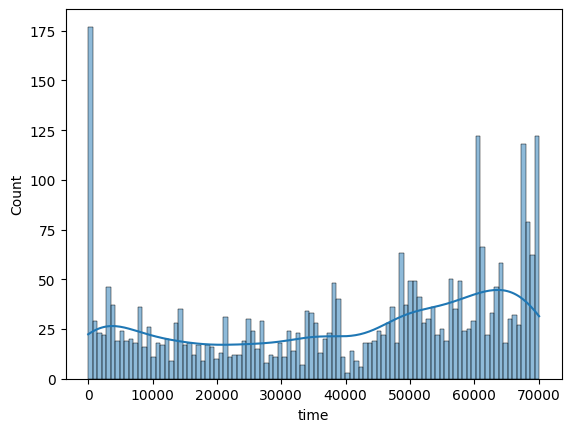

In [17]:
# matplotlib: 基礎畫圖函式庫
# seaborn: 進階畫圖函式庫
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(x=df["time"], bins=100, kde=True)

In [ ]:
# 1. 表格篩選操作, DataFrame[跟你資料筆數依樣多的True/False]
test = pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
])
test[[True, False, True]]

In [ ]:
# 第二種型態: Series(一列/一行)
# 而且(&) 或者(|)
fil = (df["time"] > 65000) & (df["color"] == "#FFFFFF")
df[fil]

In [ ]:
# 2. 轉換操作: apply
# 型態: 字典. 操作:[key]
# 型態: 函式int 操作:(4.2)
b = int
b(4.2)

In [28]:
def square(n):
    ans = n * n
    return ans
square(4)

16

In [30]:
test = pd.Series([1, 2, 3])
test.apply(square)

0    1
1    4
2    9
dtype: int64

In [31]:
import urllib.request as req
import jieba

url = "https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big"
req.urlretrieve(url, "dict.big")
jieba.set_dictionary("dict.big")

In [35]:
def func(s):
    return " ".join(jieba.cut(s))
df["text"] = df["text"].apply(func)
df

,text,color,size,position,time,sn,userid
0,祝 ☆ TV 動畫 化,#B538FA,2,1,0,23255401,kumosorayk
1,要 怎麼 用 雙語,#FFFFFF,1,0,0,28413131,ilovehyunjin
2,20210822,#FFFFFF,1,0,2,22480205,a12365478957
3,卡個,#FFFFFF,1,0,3,22269424,kuojack123
4,2021 / 10 / 6 五刷,#FFFFFF,1,0,3,23377135,xu3u6xu06
...,...,...,...,...,...,...,...
2996,2022.01 . 16 神作 留名,#FFFFFF,1,0,70070,24812125,ilove960914
2997,2022.02 . 13 神作 留名,#FFFFFF,1,0,70070,25346992,cccc8787163
2998,大哥 沒有 輸 ， 大哥 一路 走 好 !,#FFFFFF,1,0,70070,28796341,jeffrey4358
2999,2022.08 . 09 神作 留名,#FFFFFF,1,0,70070,28796358,jeffrey4358


In [42]:
import jieba.analyse
article = "\n".join(df["text"])
jieba.analyse.extract_tags(article, topK=50, withWeight=True)

[('大哥', 0.3424617285672506),
 ('沒有', 0.2907029357483854),
 ('2021', 0.15004022490239247),
 ('2022', 0.13284811579899333),
 ('10', 0.079708869479396),
 ('QQ', 0.07033135542299647),
 ('巴哈', 0.06119056230751732),
 ('什麼', 0.060953841366596935),
 ('11', 0.059390922357197014),
 ('12', 0.05782800334779709),
 ('怎麼', 0.05470216532899725),
 ('留名', 0.04852522257942215),
 ('煉獄', 0.046887570281997644),
 ('...', 0.04532465127259772),
 ('免費', 0.0437617322631978),
 ('神作', 0.0437617322631978),
 ('三哥', 0.0437617322631978),
 ('可愛', 0.04219881325379788),
 ('付費', 0.03907297523499804),
 ('真的', 0.03756319225034253),
 ('BGM', 0.037510056225598117),
 ('火車', 0.035947137216198195),
 ('這裡', 0.035947137216198195),
 ('還是', 0.034384218206798274),
 ('不會', 0.034384218206798274),
 ('炭治郎', 0.03282129919739835),
 ('電影院', 0.03125838018799843),
 ('嗚嗚', 0.03125838018799843),
 ('應該', 0.03125838018799843),
 ('豬豬', 0.03125838018799843),
 ('出來', 0.03125838018799843),
 ('www', 0.029695461178598507),
 ('那個', 0.029695461178598507)